## Dataset pickling

Neural netwoks are trained on pickled subsets of the data for speed reasons. This notebook highlights how to create such datasets.

The datasets available are:

- **training_restricted** contains a large portion of APOGEE parameter space. All stars are included

- **behaved_restricted** remove stars for which abundances are not well estimated

- **training_full** contains almost all stars with a simple cut to only keep those stars with good signal-to-noise


In [1]:
import apogee.tools.read as apread
import apogee.tools.path as apogee_path
from apogee.tools import bitmask
import numpy as np
import matplotlib.pyplot as plt


from apoNN.src.datasets import ApogeeDataset
from apoNN.src.utils import dump as dump 
from apoNN.src.utils import load as load 

apogee_path.change_dr(16)

### Creating such a dataset

The first stage is to create ```cut_allStar```, a filtered out version of ```allStar``` containing those stars used for training 

#### Ascap_extended

Ascap extended is a dataset containing stars across a certain range of temperatures and surface gravity

In [2]:
allStar= apread.allStar(rmcommissioning=True,main=False,ak=True, akvers='targ',adddist=False)

upper_temp_cut = allStar["Teff"]<7000
lower_temp_cut = allStar["Teff"]>3500
lower_g_cut = allStar["logg"]>1.
upper_g_cut = allStar["logg"]<3.5
snr_cut = allStar["SNR"]>100
snr_highcut = allStar["SNR"]<500
feh_outliercut = allStar["Fe_H"]>-5
o_outliercut = allStar["O_FE"]>-5
c_outliercut = allStar["C_FE"]>-5
na_outliercut = allStar["Na_FE"]>-5
mg_outliercut = allStar["Mg_FE"]>-5
si_outliercut = allStar["Si_FE"]>-5
al_outliercut = allStar["Al_FE"]>-5
s_outliercut = allStar["S_FE"]>-5
p_outliercut = allStar["P_FE"]>-5
ti_outliercut = allStar["Ti_FE"]>-5
cr_outliercut = allStar["Cr_FE"]>-5



combined_cut = lower_g_cut & upper_g_cut & lower_temp_cut & upper_temp_cut & snr_cut & snr_highcut & feh_outliercut & o_outliercut &  c_outliercut & na_outliercut & mg_outliercut & si_outliercut & al_outliercut & p_outliercut & s_outliercut & ti_outliercut & cr_outliercut
cut_allStar = allStar[combined_cut][:13000]

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/tools/read.py:303: RuntimeWarning: Extinction-corrected J,H,K not added because esutil is not installed
  warnings.warn("Extinction-corrected J,H,K not added because esutil is not installed",RuntimeWarning)


the next stage is to create a dataset object by passing the ```cut_allStar``` to an ```ApogeeDataset```. The dataset is then stored by calling ```dataset.dump```. Datasets are loaded from pickled files by specifying a ```filename```

In [3]:
dataset = ApogeeDataset(cut_allStar,outputs = ["aspcap","apstar","mask","physical","idx"])

In [4]:
dataset[0]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([-1., -1., -1.,  ..., -1., -1., -1.]),
 tensor([False, False, False,  ..., False, False, False]),
 tensor([0.3061, 0.3904]),
 0)

In [4]:
dataset.dump("behaved_restricted")

In [5]:
test_dataset =   ApogeeDataset("behaved_restricted",outputs = ["aspcap","mask","physical","idx"])

In [6]:
test_dataset[0]

TypeError: string indices must be integers

In [5]:
dump(cut_allStar,"allStar_behaved_restricted")

#### Ascap_training

Because ```ascap_extended``` filters on abundances. Some regions of the temperature, logg space may not be well represented. ```ascap_training``` fixes this and creates a comprehensive training dataset

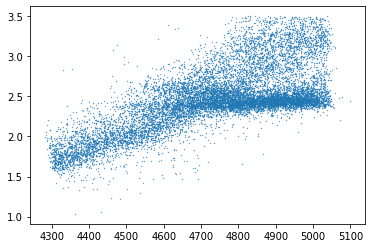

In [6]:
plt.scatter(cut_allStar["Teff"],cut_allStar["logg"],s=0.1)

In [7]:
training_cut = lower_g_cut & upper_g_cut & lower_temp_cut & upper_temp_cut & snr_cut & snr_highcut
training_cut_allStar = allStar[training_cut][:13000]

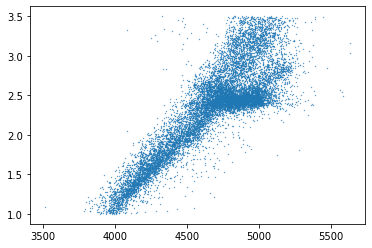

In [8]:
plt.scatter(training_cut_allStar["Teff"],training_cut_allStar["logg"],s=0.1)

In [9]:
dataset = ApogeeDataset(training_cut_allStar[:13000],outputs = ["aspcap","apstar","mask","physical","idx"])

In [2]:
dataset[0]

NameError: name 'dataset' is not defined

In [ ]:
dataset.dump("training_restricted")


In [ ]:
dump(training_cut_allStar,"allStar_training_restricted")

#### Ascap_full_training

So far we have restricted ourselves to training on a fairly small subset of the Apogee data. Here we train on a much larger portion of the APOGEE data.

In [ ]:
allStar= apread.allStar(rmcommissioning=True,main=False,ak=True, akvers='targ',adddist=False)

lower_temp_cut = allStar["Teff"]>10
lower_g_cut = allStar["logg"]>0.1
snr_cut = allStar["SNR"]>100
snr_highcut = allStar["SNR"]<500


combined_cut = lower_g_cut  & lower_temp_cut & snr_cut & snr_highcut
cut_full_allStar = allStar[combined_cut][:10000]

In [ ]:
full_allStar_dataset = ApogeeDataset(cut_full_allStar,outputs = ["aspcap","apstar","mask","physical","idx"])

In [17]:
full_allStar_dataset.dump("training_full")

In [18]:
dump(cut_full_allStar,"training_full")